# Generate Graphs for Connected Component

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as NX
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import time
import datetime
import os,sys

# Characteristics of Leaflet Finder Graphs

    count    24056.000000
    mean         5.971566
    std          1.305737
    min          2.000000
    25%          5.000000
    50%          6.000000
    75%          7.000000
    max         12.000000
    
    
Using NetworkX the largest graph that can be generated on a Stampede node with 32 GB memory is **10 Mio** nodes.

In [ ]:
#OUTPUT_DIR=os.path.join(os.getcwd(), "data")
OUTPUT_DIR="/work/01131/tg804093/graph"

try:
    os.makedirs(OUTPUT_DIR)
except:
    pass

#number_of_nodes=[    10000, 
#                    100000,
#                   1000000,
#                  10000000,
#                 100000000,
#                1000000000]
number_of_nodes=[100000000]

captured_times = {}
for number in number_of_nodes:
    start = time.time()
    degree_vector = np.random.normal(5.971566, 1.305737, number)
    graph = NX.expected_degree_graph(degree_vector)
    NX.write_edgelist(graph,
                      os.path.join(OUTPUT_DIR, 
                        "graph_edges_%d_%d.csv"%(number, NX.number_of_edges(graph))),
                      delimiter=",")
    
    end = time.time()
    captured_times[number]=end-start

In [21]:
str(captured_times)

'{20000: 1.1708459854125977, 40000: 2.56634783744812, 640000: 49.59387397766113, 80000: 5.55070686340332, 1280000: 108.38637399673462, 160000: 11.38257098197937, 10000: 1.0456390380859375, 320000: 23.956480979919434}'

In [24]:
!ls -lta {OUTPUT_DIR}

total 124280
-rw-------  1 tg804093 G-800683 65940271 Aug  1 13:41 graph_edges_1280000_3819403.csv
drwx------  2 tg804093 G-800683     4096 Aug  1 13:40 .
-rw-------  1 tg804093 G-800683 31826390 Aug  1 13:39 graph_edges_640000_1911152.csv
-rw-------  1 tg804093 G-800683 15576940 Aug  1 13:38 graph_edges_320000_955401.csv
-rw-------  1 tg804093 G-800683  7461452 Aug  1 13:38 graph_edges_160000_478000.csv
-rw-------  1 tg804093 G-800683  3504310 Aug  1 13:38 graph_edges_80000_238049.csv
-rw-------  1 tg804093 G-800683  1727441 Aug  1 13:37 graph_edges_40000_119599.csv
-rw-------  1 tg804093 G-800683   819338 Aug  1 13:37 graph_edges_20000_58979.csv
-rw-------  1 tg804093 G-800683   379940 Aug  1 13:37 graph_edges_10000_29735.csv
drwx------ 12 tg804093 G-800683     4096 Aug  1 13:31 ..


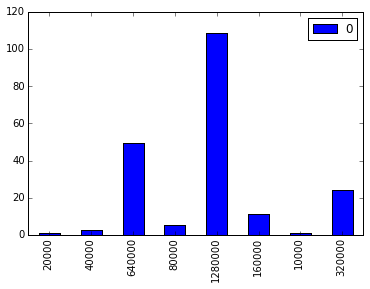

In [26]:
pd = DataFrame.from_dict(captured_times, orient="index")
pd.plot(kind="bar")

## Spark

In [1]:
%run ../util/init_spark.py

In [2]:
sc = SparkContext()

In [3]:
sc.parallelize([1,2,3]).count()

ERROR:py4j.java_gateway:Error while sending or receiving.
Traceback (most recent call last):
  File "/home1/01131/tg804093/src/supercomputing2015-tutorial/02_hadoop_on_hpc/work/spark-1.4.1-bin-hadoop2.6/python/lib/py4j-0.8.2.1-src.zip/py4j/java_gateway.py", line 479, in send_command
    raise Py4JError("Answer from Java side is empty")
Py4JError: Answer from Java side is empty
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server
Traceback (most recent call last):
  File "/home1/01131/tg804093/src/supercomputing2015-tutorial/02_hadoop_on_hpc/work/spark-1.4.1-bin-hadoop2.6/python/lib/py4j-0.8.2.1-src.zip/py4j/java_gateway.py", line 425, in start
    self.socket.connect((self.address, self.port))
  File "/home1/01131/tg804093/anaconda/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 111] Connection refused
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server
Traceback (most 

Py4JNetworkError: An error occurred while trying to connect to the Java server